In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('clustering_data.csv')
data.head()

,projectid,teacher_acctid,title,short_description,need_statement,essay,schoolid,school_ncesid,school_latitude,school_longitude,...,len_need_statement,Num_essays_submitted,Subjectivity_title,Polarity_title,Analysis_Polarity_title,Analysis_Subjectivity_title,Subjectivity_short_description,Polarity_short_description,Analysis_Polarity_short_description,Analysis_Subjectivity_short_description
0,fffeebf4827d745aa36b17c2d38d1966,96c1a33b4f2b832595c3c6a01bc24c05,Toot Your Flute!,The rewards of playing a musical instrument is...,My students need access to a flute and percuss...,The rewards of playing a musical instrument is...,7bb6b1924a7bd181ab5568b062260966,6.346201e+10,38.654224,-121.308122,...,114,1,0.0,0.0,Neutral,Neutral,0.440476,0.279762,Positive,Positive
1,fffdfdcf27588d2d32c15c12dec3a2cb,7f00774dc719bbd571b7035e30e2fbf8,Igniting a PASSION for Reading Within Sixth Gr...,Do you remember what it was like the first tim...,My students need 36 copies of The Westing Game...,Do you remember what it was like the first tim...,be026a82602a738ddb5a3324abcb89c5,6.000620e+10,37.766315,-120.856392,...,133,2,0.0,0.0,Neutral,Neutral,0.407407,0.198148,Positive,Positive
2,fffc602212a37bd35f49c51d2cd6a514,d6bea980ee4c8ba363d0e7e18752603e,Helping Oakland Kids Become Happy Historians,Last year I photocopied this book for my stude...,"My students need a class set (20 copies) of ""A...",Last year I photocopied this book for my stude...,5499f2469623c6b55dfbc894392bd136,6.280500e+10,37.765576,-122.165680,...,146,6,1.0,0.8,Positive,Positive,0.284762,0.120000,Positive,Positive
3,fffc128714a3035d7af7637c4ab30615,7426880bb0847ab88162169e6900a6d2,Fidget Toys: Helping All Students Learn,"Every class has students who like to wriggle, ...",My students need classroom friendly fidgets an...,"Every class has students who like to wriggle, ...",33e3e6caae05b1fe85e77eeb148915f6,6.343201e+10,32.720600,-117.159120,...,61,16,0.0,0.0,Neutral,Neutral,0.000000,0.000000,Neutral,Neutral
4,fffbc23d5c2ece64168af350ab9f6cad,4f23071c37c4aa0a96ea4ff336138c61,Next Generation Science,"Scientist Neil deGrasse Tyson said, ""For me, I...",My students need access to 3 Chromebooks to de...,"Scientist Neil deGrasse Tyson said, ""For me, I...",df83213f7800d05086a121ab1730b545,6.306601e+10,33.885330,-117.761117,...,151,2,0.0,0.0,Neutral,Neutral,0.577778,0.255556,Positive,Positive


In [3]:
data.columns

Index(['projectid', 'teacher_acctid', 'title', 'short_description',
       'need_statement', 'essay', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'len_essay', 'len_short_desc', 'len_need_statement',
       'Num_essays_submitted', 'Subje

In [4]:
data.isnull().sum()

projectid                                      0
teacher_acctid                                 0
title                                          2
short_description                             12
need_statement                                 0
essay                                          1
schoolid                                       0
school_ncesid                               6167
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     1
school_metro                                8227
school_district                              109
school_county                                  0
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp         

In [5]:
# drop columns with missing values
columns = ['fulfillment_labor_materials', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'school_metro', 'school_ncesid',
           'school_district', ]
data = data.drop(columns, axis=1)
data.isnull().sum()


projectid                                   0
teacher_acctid                              0
title                                       2
short_description                          12
need_statement                              0
essay                                       1
schoolid                                    0
school_latitude                             0
school_longitude                            0
school_city                                 0
school_state                                0
school_zip                                  1
school_county                               0
school_charter                              0
school_magnet                               0
school_year_round                           0
school_nlns                                 0
school_kipp                                 0
school_charter_ready_promise                0
teacher_prefix                              1
teacher_teach_for_america                   0
teacher_ny_teaching_fellow        

In [6]:
clustering_columns = ['projectid', 'school_city', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',       
'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow',            
'primary_focus_subject', 'primary_focus_area', 'poverty_level', 'eligible_double_your_impact_match', 'eligible_almost_home_match',
'len_essay', 'len_short_desc', 'len_need_statement', 'Num_essays_submitted', 'Analysis_Polarity_short_description', 'Analysis_Polarity_title']

data = data[clustering_columns]

In [7]:
data.isnull().sum()

projectid                               0
school_city                             0
school_charter                          0
school_magnet                           0
school_year_round                       0
school_nlns                             0
school_kipp                             0
school_charter_ready_promise            0
teacher_prefix                          1
teacher_teach_for_america               0
teacher_ny_teaching_fellow              0
primary_focus_subject                  13
primary_focus_area                     13
poverty_level                           0
eligible_double_your_impact_match       0
eligible_almost_home_match              0
len_essay                               0
len_short_desc                          0
len_need_statement                      0
Num_essays_submitted                    0
Analysis_Polarity_short_description     0
Analysis_Polarity_title                 0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

projectid                              0
school_city                            0
school_charter                         0
school_magnet                          0
school_year_round                      0
school_nlns                            0
school_kipp                            0
school_charter_ready_promise           0
teacher_prefix                         0
teacher_teach_for_america              0
teacher_ny_teaching_fellow             0
primary_focus_subject                  0
primary_focus_area                     0
poverty_level                          0
eligible_double_your_impact_match      0
eligible_almost_home_match             0
len_essay                              0
len_short_desc                         0
len_need_statement                     0
Num_essays_submitted                   0
Analysis_Polarity_short_description    0
Analysis_Polarity_title                0
dtype: int64

In [9]:
data.dtypes

projectid                              object
school_city                            object
school_charter                         object
school_magnet                          object
school_year_round                      object
school_nlns                            object
school_kipp                            object
school_charter_ready_promise           object
teacher_prefix                         object
teacher_teach_for_america              object
teacher_ny_teaching_fellow             object
primary_focus_subject                  object
primary_focus_area                     object
poverty_level                          object
eligible_double_your_impact_match      object
eligible_almost_home_match             object
len_essay                               int64
len_short_desc                          int64
len_need_statement                      int64
Num_essays_submitted                    int64
Analysis_Polarity_short_description    object
Analysis_Polarity_title           

In [10]:
pd.set_option('display.max_columns', None)
data.head()

,projectid,school_city,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title
0,fffeebf4827d745aa36b17c2d38d1966,Fair Oaks,f,f,f,f,f,f,Mr.,f,f,Music,Music & The Arts,highest poverty,f,f,1212,190,114,1,Positive,Neutral
1,fffdfdcf27588d2d32c15c12dec3a2cb,Oakdale,f,f,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,high poverty,f,f,1545,197,133,2,Positive,Neutral
2,fffc602212a37bd35f49c51d2cd6a514,Oakland,f,f,f,f,f,f,Ms.,f,f,Social Sciences,History & Civics,highest poverty,f,f,2162,191,146,6,Positive,Positive
3,fffc128714a3035d7af7637c4ab30615,San Diego,t,f,f,f,t,f,Ms.,t,f,Special Needs,Special Needs,highest poverty,t,f,1693,197,61,16,Neutral,Neutral
4,fffbc23d5c2ece64168af350ab9f6cad,Yorba Linda,f,f,f,f,f,f,Mrs.,f,f,Applied Sciences,Math & Science,low poverty,f,f,1587,198,151,2,Positive,Neutral


In [11]:
col = ['school_charter', 'school_magnet', 'school_year_round', 'school_nlns',	'school_kipp',	'school_charter_ready_promise',
        'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'eligible_double_your_impact_match', 'eligible_almost_home_match']

data[col] = data[col].replace({'t': 1, 'f': 0})
data.head()

C:\Users\shambhavi\AppData\Local\Temp\ipykernel_38940\2063580883.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'t': 1, 'f': 0})


,projectid,school_city,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title
0,fffeebf4827d745aa36b17c2d38d1966,Fair Oaks,0,0,0,0,0,0,Mr.,0,0,Music,Music & The Arts,highest poverty,0,0,1212,190,114,1,Positive,Neutral
1,fffdfdcf27588d2d32c15c12dec3a2cb,Oakdale,0,0,0,0,0,0,Mrs.,0,0,Literacy,Literacy & Language,high poverty,0,0,1545,197,133,2,Positive,Neutral
2,fffc602212a37bd35f49c51d2cd6a514,Oakland,0,0,0,0,0,0,Ms.,0,0,Social Sciences,History & Civics,highest poverty,0,0,2162,191,146,6,Positive,Positive
3,fffc128714a3035d7af7637c4ab30615,San Diego,1,0,0,0,1,0,Ms.,1,0,Special Needs,Special Needs,highest poverty,1,0,1693,197,61,16,Neutral,Neutral
4,fffbc23d5c2ece64168af350ab9f6cad,Yorba Linda,0,0,0,0,0,0,Mrs.,0,0,Applied Sciences,Math & Science,low poverty,0,0,1587,198,151,2,Positive,Neutral


In [12]:
data['teacher_prefix'].unique()

array(['Mr.', 'Mrs.', 'Ms.', 'Dr.'], dtype=object)

In [13]:
# 1 for female, 0 for male and 2 for gender neutral 
data['teacher_prefix'] = data['teacher_prefix'].replace({
    'Mrs.': 1, 
    'Ms.': 1, 
    'Mr.': 0, 
    'Dr.': 2,
})

data['teacher_prefix'].unique()

C:\Users\shambhavi\AppData\Local\Temp\ipykernel_38940\2636288910.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['teacher_prefix'] = data['teacher_prefix'].replace({


array([0, 1, 2], dtype=int64)

In [14]:
data['poverty_level'].unique()

array(['highest poverty', 'high poverty', 'low poverty',
       'moderate poverty'], dtype=object)

In [15]:
data['poverty_level'] = data['poverty_level'].replace({
    'highest poverty': 1, 
    'high poverty': 2, 
    'moderate poverty': 3, 
    'low poverty': 4
})

data['poverty_level'].unique()

C:\Users\shambhavi\AppData\Local\Temp\ipykernel_38940\3495543316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['poverty_level'] = data['poverty_level'].replace({


array([1, 2, 4, 3], dtype=int64)

In [16]:
data['Analysis_Polarity_short_description'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [17]:
data['Analysis_Polarity_short_description'] = data['Analysis_Polarity_short_description'].replace({
    'Positive': 1, 
    'Negative': -1, 
    'Neutral': 0
})

data['Analysis_Polarity_title'] = data['Analysis_Polarity_title'].replace({
    'Positive': 1, 
    'Negative': -1, 
    'Neutral': 0
})

C:\Users\shambhavi\AppData\Local\Temp\ipykernel_38940\1786968190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Analysis_Polarity_short_description'] = data['Analysis_Polarity_short_description'].replace({
C:\Users\shambhavi\AppData\Local\Temp\ipykernel_38940\1786968190.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Analysis_Polarity_title'] = data['Analysis_Polarity_title'].replace({


In [18]:
data.dtypes

projectid                              object
school_city                            object
school_charter                          int64
school_magnet                           int64
school_year_round                       int64
school_nlns                             int64
school_kipp                             int64
school_charter_ready_promise            int64
teacher_prefix                          int64
teacher_teach_for_america               int64
teacher_ny_teaching_fellow              int64
primary_focus_subject                  object
primary_focus_area                     object
poverty_level                           int64
eligible_double_your_impact_match       int64
eligible_almost_home_match              int64
len_essay                               int64
len_short_desc                          int64
len_need_statement                      int64
Num_essays_submitted                    int64
Analysis_Polarity_short_description     int64
Analysis_Polarity_title           

In [19]:
data['school_city'].unique()

array(['Fair Oaks', 'Oakdale', 'Oakland', 'San Diego', 'Yorba Linda',
       'San Francisco', 'San Juan Capo', 'Sunnyvale', 'Los Angeles',
       'San Jose', 'Van Nuys', 'Reseda', 'Long Beach', 'Rio Linda',
       'Rancho Cordova', 'Sacramento', 'Lennox', 'West Covina',
       'San Pedro', 'Bakersfield', 'Carson', 'North Hills', 'Dublin',
       'Santa Maria', 'Gilroy', 'Santa Ana', 'Morgan Hill', 'Fremont',
       'Hawthorne', 'Fullerton', 'Hermosa Beach', 'Salinas', 'Lawndale',
       'Castaic', 'Saugus', 'Concord', 'Compton', 'Danville',
       'Laguna Hills', 'Hayward', 'Arleta', 'Fairfield', 'Richmond',
       'Sebastopol', 'Glendale', 'San Lorenzo', 'N Hollywood',
       'Citrus Hts', 'Pleasant Hill', 'Anaheim', 'Cudahy', 'Livermore',
       'Panorama City', 'Gardena', 'Newport Beach', 'Castro Valley',
       'Daly City', 'S San Fran', 'West Hills', 'Huntingtn Bch',
       'Lake Isabella', 'Santee', 'Orange', 'La Mesa', 'San Mateo',
       'El Monte', 'Antioch', 'Pleasanton', 'La

In [20]:
CA_region = pd.read_csv("us-cities-table.csv")
CA_region.head()

,population,pop2024,pop2023,pop2022,pop2020,pop2010,growth,region,city,usps,state,countyFips,county,densityMi,slug,areaMi,lng,lat,type,rank
0,3795936,3795936,3820914,3822782,3895848,3795206,-0.00654,Southeast,Los Angeles,CA,California,6037.0,Los Angeles County,8068,california/los-angeles,470.517,-118.411,34.0194,City,1
1,1388996,1388996,1388320,1387378,1386292,1305632,0.00049,Southeast,San Diego,CA,California,6073.0,San Diego County,4260,california/san-diego,326.087,-117.136,32.8150,City,2
2,956433,956433,969655,972082,1009319,954552,-0.01364,West,San Jose,CA,California,6085.0,Santa Clara County,5375,california/san-jose,177.939,-121.815,37.2960,City,3
3,788478,788478,808988,807774,870518,805519,-0.02535,Northwest,San Francisco,CA,California,6075.0,San Francisco County,16884,california/san-francisco,46.700,-123.032,37.7272,City,4
4,546718,546718,545716,545253,542710,497763,0.00184,Central,Fresno,CA,California,6019.0,Fresno County,4720,california/fresno,115.818,-119.793,36.7827,City,5


In [21]:
CA_region = CA_region[['city','region']]
CA_region.head()

,city,region
0,Los Angeles,Southeast
1,San Diego,Southeast
2,San Jose,West
3,San Francisco,Northwest
4,Fresno,Central


In [22]:
data_cluster = pd.merge(data, CA_region, left_on='school_city', right_on='city', how='left')

In [23]:
data_cluster.shape

(126960, 24)

In [24]:
data_cluster.isnull().sum()

projectid                                  0
school_city                                0
school_charter                             0
school_magnet                              0
school_year_round                          0
school_nlns                                0
school_kipp                                0
school_charter_ready_promise               0
teacher_prefix                             0
teacher_teach_for_america                  0
teacher_ny_teaching_fellow                 0
primary_focus_subject                      0
primary_focus_area                         0
poverty_level                              0
eligible_double_your_impact_match          0
eligible_almost_home_match                 0
len_essay                                  0
len_short_desc                             0
len_need_statement                         0
Num_essays_submitted                       0
Analysis_Polarity_short_description        0
Analysis_Polarity_title                    0
city      

In [25]:
# fill missing values with other
data_cluster['region'] = data_cluster['region'].fillna('Other')
data_cluster = data_cluster.drop(['city', 'school_city'], axis=1)
data_cluster.isnull().sum()


projectid                              0
school_charter                         0
school_magnet                          0
school_year_round                      0
school_nlns                            0
school_kipp                            0
school_charter_ready_promise           0
teacher_prefix                         0
teacher_teach_for_america              0
teacher_ny_teaching_fellow             0
primary_focus_subject                  0
primary_focus_area                     0
poverty_level                          0
eligible_double_your_impact_match      0
eligible_almost_home_match             0
len_essay                              0
len_short_desc                         0
len_need_statement                     0
Num_essays_submitted                   0
Analysis_Polarity_short_description    0
Analysis_Polarity_title                0
region                                 0
dtype: int64

In [26]:
data_cluster = pd.get_dummies(data_cluster, columns=['region', 'primary_focus_subject', 'primary_focus_area'])
data_cluster.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,1,0,0,1212,190,114,1,1,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,2,0,0,1545,197,133,2,1,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,1,0,0,2162,191,146,6,1,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,1,1,0,1693,197,61,16,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,4,0,0,1587,198,151,2,1,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [27]:
data_cluster.shape

(126960, 62)

In [28]:
pd.set_option('display.max_rows', None)
data_cluster.dtypes

projectid                                      object
school_charter                                  int64
school_magnet                                   int64
school_year_round                               int64
school_nlns                                     int64
school_kipp                                     int64
school_charter_ready_promise                    int64
teacher_prefix                                  int64
teacher_teach_for_america                       int64
teacher_ny_teaching_fellow                      int64
poverty_level                                   int64
eligible_double_your_impact_match               int64
eligible_almost_home_match                      int64
len_essay                                       int64
len_short_desc                                  int64
len_need_statement                              int64
Num_essays_submitted                            int64
Analysis_Polarity_short_description             int64
Analysis_Polarity_title     

In [29]:
boolean_columns = [
    'region_Central', 'region_East', 'region_North', 'region_Northwest', 'region_Other', 
    'region_South', 'region_Southeast', 'region_Southwest', 'region_West', 
    'primary_focus_subject_Applied Sciences', 'primary_focus_subject_Character Education',
    'primary_focus_subject_Civics & Government', 'primary_focus_subject_College & Career Prep', 
    'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
    'primary_focus_subject_Early Development', 'primary_focus_subject_Economics', 
    'primary_focus_subject_Environmental Science', 'primary_focus_subject_Extracurricular', 
    'primary_focus_subject_Foreign Languages', 'primary_focus_subject_Gym & Fitness', 
    'primary_focus_subject_Health & Life Science', 'primary_focus_subject_Health & Wellness', 
    'primary_focus_subject_History & Geography', 'primary_focus_subject_Literacy', 
    'primary_focus_subject_Literature & Writing', 'primary_focus_subject_Mathematics', 
    'primary_focus_subject_Music', 'primary_focus_subject_Nutrition', 'primary_focus_subject_Other',
    'primary_focus_subject_Parent Involvement', 'primary_focus_subject_Performing Arts', 
    'primary_focus_subject_Social Sciences', 'primary_focus_subject_Special Needs', 
    'primary_focus_subject_Sports', 'primary_focus_subject_Visual Arts', 
    'primary_focus_area_Applied Learning', 'primary_focus_area_Health & Sports', 
    'primary_focus_area_History & Civics', 'primary_focus_area_Literacy & Language', 
    'primary_focus_area_Math & Science', 'primary_focus_area_Music & The Arts', 
    'primary_focus_area_Special Needs'
]

data_cluster[boolean_columns] = data_cluster[boolean_columns].astype(int)
data_cluster.dtypes


projectid                                      object
school_charter                                  int64
school_magnet                                   int64
school_year_round                               int64
school_nlns                                     int64
school_kipp                                     int64
school_charter_ready_promise                    int64
teacher_prefix                                  int64
teacher_teach_for_america                       int64
teacher_ny_teaching_fellow                      int64
poverty_level                                   int64
eligible_double_your_impact_match               int64
eligible_almost_home_match                      int64
len_essay                                       int64
len_short_desc                                  int64
len_need_statement                              int64
Num_essays_submitted                            int64
Analysis_Polarity_short_description             int64
Analysis_Polarity_title     

In [30]:
pd.set_option('display.max_columns', None)
data_cluster.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,1,0,0,1212,190,114,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,2,0,0,1545,197,133,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,1,0,0,2162,191,146,6,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,1,1,0,1693,197,61,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,4,0,0,1587,198,151,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler

continuous_columns = ['len_essay', 'len_short_desc', 'len_need_statement', 
                      'Num_essays_submitted', 'Analysis_Polarity_short_description', 
                      'Analysis_Polarity_title', 'poverty_level']

scaler = MinMaxScaler()
data_cluster[continuous_columns] = scaler.fit_transform(data_cluster[continuous_columns])
data_cluster.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.198623,0.169340,0.050732,0.000000,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,0.333333,0,0,0.253196,0.175579,0.060669,0.005155,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,0.000000,0,0,0.354310,0.170232,0.067469,0.025773,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,0.000000,1,0,0.277450,0.175579,0.023013,0.077320,0.5,0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,1.000000,0,0,0.260079,0.176471,0.070084,0.005155,1.0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
data_cluster.to_csv('clustering_data_cleaned.csv', index=False)

In [33]:
# keep all except projectid
data_2 = data_cluster.drop(['projectid'], axis=1)

In [34]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from tqdm import tqdm  

# silhouette_scores = []

# k_range = range(2, 10)
# for k in tqdm(k_range, desc="Calculating Silhouette Scores", unit="k"):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data_2)
#     score = silhouette_score(data_2, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot silhouette scores vs. number of clusters
# plt.plot(k_range, silhouette_scores, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for Optimal k')
# plt.show()


In [35]:
data_2.head()

,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.198623,0.169340,0.050732,0.000000,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0.333333,0,0,0.253196,0.175579,0.060669,0.005155,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0.000000,0,0,0.354310,0.170232,0.067469,0.025773,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,1,1,0,0.000000,1,0,0.277450,0.175579,0.023013,0.077320,0.5,0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1.000000,0,0,0.260079,0.176471,0.070084,0.005155,1.0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Kmeans, DBSCAN, HDBSCAN

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_2)

n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
labels = dbscan.labels_

In [37]:
data_cluster_labels = data_cluster.copy()
data_cluster_labels['Cluster labels with DBSCAN'] = dbscan.labels_

In [38]:
!pip install hdbscan


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.1)
hdb.fit(data_2)

labels = hdb.labels_ 
data_cluster_labels['Cluster labels with HDBSCAN'] = labels


In [40]:
data_cluster_labels.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,Cluster labels with DBSCAN,Cluster labels with HDBSCAN
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.198623,0.169340,0.050732,0.000000,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,734
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,0.333333,0,0,0.253196,0.175579,0.060669,0.005155,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2849
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,0.000000,0,0,0.354310,0.170232,0.067469,0.025773,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,1611
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,0.000000,1,0,0.277450,0.175579,0.023013,0.077320,0.5,0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1,-1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,1.000000,0,0,0.260079,0.176471,0.070084,0.005155,1.0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2253


In [41]:
data_cluster_labels.shape

(126960, 64)

In [42]:
from sklearn.metrics import calinski_harabasz_score

score1 = calinski_harabasz_score(data_2, hdb.labels_)
score2 = calinski_harabasz_score(data_2, dbscan.labels_)
print("Calinski-Harabasz Index for HDBSCAN:", score1, "\n",
      "Calinski-Harabasz Index for DBSCAN:", score2)

Calinski-Harabasz Index for HDBSCAN: 121.81488391925977 
 Calinski-Harabasz Index for DBSCAN: 121.44446438983532


In [43]:
hdbscan_clusters = len(set(hdb.labels_)) - (1 if -1 in hdb.labels_ else 0)
dbscan_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

print(f"HDBSCAN Clusters: {hdbscan_clusters}")
print(f"DBSCAN Clusters: {dbscan_clusters}")

HDBSCAN Clusters: 3390
DBSCAN Clusters: 3450


In [44]:
from sklearn.metrics import davies_bouldin_score
db_dbi = davies_bouldin_score(data_2, dbscan.labels_)
hdb_dbi = davies_bouldin_score(data_2, hdb.labels_)

print(f"Davies-Bouldin Index (DBSCAN): {db_dbi}")
print(f"Davies-Bouldin Index (HDBSCAN): {hdb_dbi}")


Davies-Bouldin Index (DBSCAN): 1.1947850990604405
Davies-Bouldin Index (HDBSCAN): 1.2023809040128994


In [45]:
!pip install umap-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


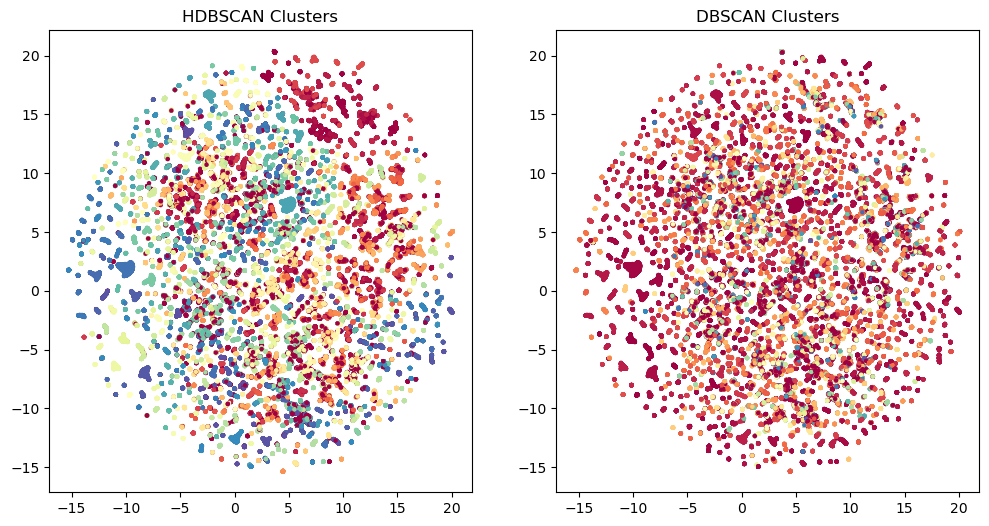

In [46]:
import matplotlib.pyplot as plt
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(data_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdb.labels_, cmap='Spectral', s=5)
plt.title("HDBSCAN Clusters")

plt.subplot(1, 2, 2)
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan.labels_, cmap='Spectral', s=5)
plt.title("DBSCAN Clusters")

plt.show()


In [47]:
# Re running the clustering with different parameters
hdb = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=50, cluster_selection_epsilon=0.2)
hdb.fit(data_2)

labels_sample = hdb.labels_ 

data_cluster_sample = data_cluster.copy()
data_cluster_sample['Cluster labels with HDBSCAN 1'] = labels_sample

Text(0.5, 1.0, 'HDBSCAN Clusters')

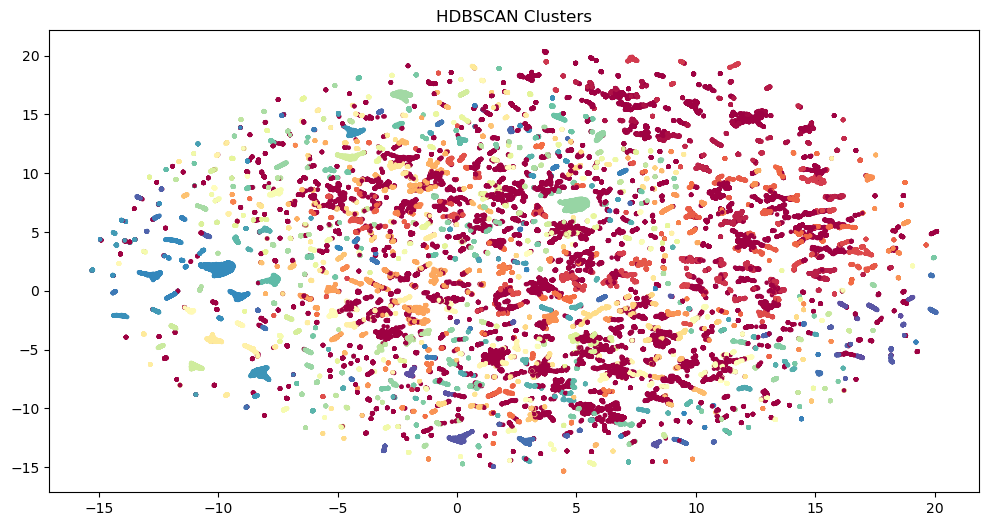

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_sample, cmap='Spectral', s=5)
plt.title("HDBSCAN Clusters")

In [49]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_sample)) - (1 if -1 in labels_sample else 0)
print(f"Number of clusters: {n_clusters_}")

# Calinski-Harabasz Index
score = calinski_harabasz_score(data_2, labels_sample)
print("Calinski-Harabasz Index:", score)

# Davies-Bouldin Index
dbi = davies_bouldin_score(data_2, labels_sample)
print(f"Davies-Bouldin Index: {dbi}")

Number of clusters: 591
Calinski-Harabasz Index: 266.2883947372128
Davies-Bouldin Index: 1.2973897226910993


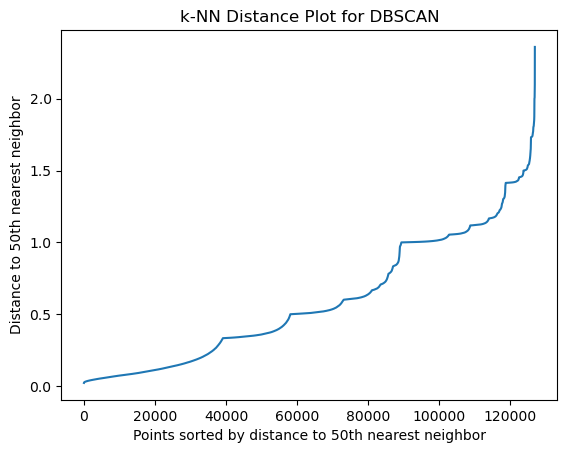

In [50]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set `min_samples` equal to the value you're using in DBSCAN
min_samples = 50  # Adjust based on your dataset

# Compute the k-Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_2)
distances, indices = neighbors.kneighbors(data_2)

# Sort distances and plot
distances = np.sort(distances[:, -1])  # Sort by the kth nearest distance
plt.plot(distances)
plt.xlabel("Points sorted by distance to {}th nearest neighbor".format(min_samples))
plt.ylabel("Distance to {}th nearest neighbor".format(min_samples))
plt.title("k-NN Distance Plot for DBSCAN")
plt.show()


In [51]:
data_2.shape

(126960, 61)

Number of clusters: 191
Calinski-Harabasz Index: 689.3662102044808
Davies-Bouldin Index: 1.433335482283151


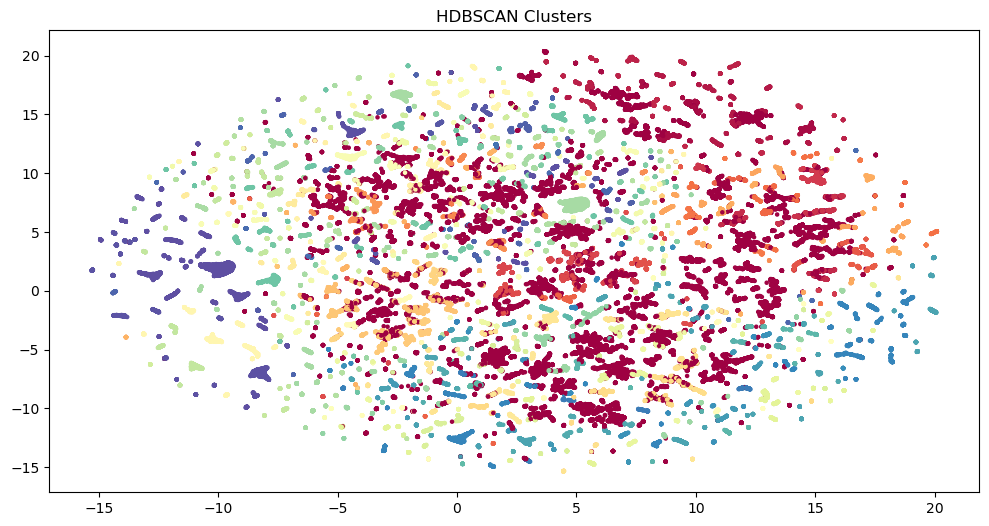

In [52]:
# Re running the clustering with different parameters
min_samples = 122 # 2 * number of features
eps = 1 # Based on the k-NN distance plot

hdb = hdbscan.HDBSCAN(min_samples=min_samples, cluster_selection_epsilon=eps)
hdb.fit(data_2)

labels_sample = hdb.labels_
data_cluster_sample['Cluster labels with HDBSCAN 2'] = labels_sample

plt.figure(figsize=(12, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_sample, cmap='Spectral', s=5)
plt.title("HDBSCAN Clusters")

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_sample)) - (1 if -1 in labels_sample else 0)
print(f"Number of clusters: {n_clusters_}")

# Calinski-Harabasz Index
score = calinski_harabasz_score(data_2, labels_sample)
print("Calinski-Harabasz Index:", score)

# Davies-Bouldin Index
dbi = davies_bouldin_score(data_2, labels_sample)
print(f"Davies-Bouldin Index: {dbi}")

# Centroid of clusters and how they differ from each other and then taking 5 projectys 
# Cluster characteristics and top 5 projects and provide some intuition what kind of characteristics in common and why do they stand out 
# some variation of feature importance 


In [53]:
data_cluster_sample.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,Cluster labels with HDBSCAN 1,Cluster labels with HDBSCAN 2
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.198623,0.169340,0.050732,0.000000,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,68,15
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,0.333333,0,0,0.253196,0.175579,0.060669,0.005155,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,431,134
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,0.000000,0,0,0.354310,0.170232,0.067469,0.025773,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,78,24
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,0.000000,1,0,0.277450,0.175579,0.023013,0.077320,0.5,0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1,-1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,1.000000,0,0,0.260079,0.176471,0.070084,0.005155,1.0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1,164


In [54]:
data_cluster_sample['Cluster labels with HDBSCAN 2'].nunique()

192

In [55]:
final_cluster_labels = data_cluster_sample[['projectid', 'Cluster labels with HDBSCAN 2']]
final_cluster_labels.head()

,projectid,Cluster labels with HDBSCAN 2
0,fffeebf4827d745aa36b17c2d38d1966,15
1,fffdfdcf27588d2d32c15c12dec3a2cb,134
2,fffc602212a37bd35f49c51d2cd6a514,24
3,fffc128714a3035d7af7637c4ab30615,-1
4,fffbc23d5c2ece64168af350ab9f6cad,164


In [56]:
# save to excel
final_cluster_labels.to_csv('final_cluster_labels.csv', index=False)

In [57]:
projects = pd.read_csv('projects.csv/projects.csv')

In [59]:
x = pd.merge(final_cluster_labels, projects[['projectid', 'school_latitude', 'school_longitude']], on='projectid')

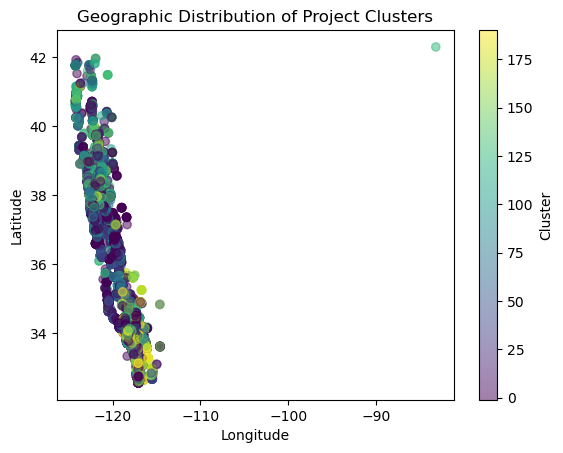

In [60]:
plt.scatter(x['school_longitude'], x['school_latitude'], c=x['Cluster labels with HDBSCAN 2'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Project Clusters')
plt.show()

In [ ]:
donors = pd.read_csv('donations.csv/donations.csv')
donors = donors[['projectid', 'donor_acctid']]

In [ ]:
clustering_metric = pd.merge(final_cluster_labels, donors, on='projectid', how='left')
print(clustering_metric.isnull().sum())

In [64]:
n = pd.read_csv("clustering_data_cleaned.csv")
n.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,poverty_level,eligible_double_your_impact_match,eligible_almost_home_match,len_essay,len_short_desc,len_need_statement,Num_essays_submitted,Analysis_Polarity_short_description,Analysis_Polarity_title,region_Central,region_East,region_North,region_Northwest,region_Other,region_South,region_Southeast,region_Southwest,region_West,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.198623,0.169340,0.050732,0.000000,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,0.333333,0,0,0.253196,0.175579,0.060669,0.005155,1.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,0.000000,0,0,0.354310,0.170232,0.067469,0.025773,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,0.000000,1,0,0.277450,0.175579,0.023013,0.077320,0.5,0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,1.000000,0,0,0.260079,0.176471,0.070084,0.005155,1.0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
n.columns

Index(['projectid', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'poverty_level',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'len_essay', 'len_short_desc', 'len_need_statement',
       'Num_essays_submitted', 'Analysis_Polarity_short_description',
       'Analysis_Polarity_title', 'region_Central', 'region_East',
       'region_North', 'region_Northwest', 'region_Other', 'region_South',
       'region_Southeast', 'region_Southwest', 'region_West',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
   